In [1]:
import numpy as np
import pandas as pd
from nilearn import surface
import nibabel as nib

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

from matplotlib import font_manager
font_manager.fontManager.addfont("/n02dat01/users/lchai/anaconda3/envs/Nm/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf")
plt.rcParams["font.sans-serif"] = "Arial" 

/n01dat01/dyli/soft/miniconda3/envs/pynb/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
dirc_L = f'/n02dat01/users/dyli/Atlas/metric_index_L.txt'
select_ind_L = np.loadtxt( dirc_L ).astype(int)
dirc_R = f'/n02dat01/users/dyli/Atlas/metric_index_R.txt'
select_ind_R = np.loadtxt( dirc_R ).astype(int)

In [3]:
emb_L = np.load('/n02dat01/users/dyli/Grad_data/sc/MPC_Grad_results/MPC_sc_vertex_volume_100_embedding_dense_emb_L_zeros.npy')
emb_R = np.load('/n02dat01/users/dyli/Grad_data/sc/MPC_Grad_results/MPC_sc_vertex_volume_100_embedding_dense_emb_R_zeros.npy')
emb = np.concatenate((emb_L[:, 0:3], emb_R[:, 0:3]), axis=0)
print(emb.shape)

emb_L_mw = np.zeros((32492, 3))
emb_R_mw = np.zeros((32492, 3))

emb_L_mw[select_ind_L, :] = emb_L[:, 0:3]
emb_R_mw[select_ind_R, :] = emb_R[:, 0:3]

(59412, 3)


In [5]:
# read the Yeo Atlas
atlas_path = '/n02dat01/users/dyli/Atlas/Schaefer2018_400Parcels_17Networks_order.dlabel.nii'
atlas = nib.load(atlas_path)
atlas_data_ = atlas.get_fdata()
atlas_data_ = np.squeeze(atlas_data_) #(64984,)
atlas_data = np.zeros(59412)
atlas_data[0:29696] = atlas_data_[select_ind_L]
atlas_data[29696:59412] = atlas_data_[select_ind_R+32492]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


# laminar

In [4]:
## 读取网络数据
net_num = 4
Net_4 = np.zeros(59412)
x = surface.load_surf_data(f'/n02dat01/users/dyli/Grad_data/support_data/laminar_int.32k.L.func.gii')
Net_4[0:29696] = x[select_ind_L]
x = surface.load_surf_data(f'/n02dat01/users/dyli/Grad_data/support_data/laminar_int.32k.R.func.gii')
Net_4[29696:59412] = x[select_ind_R]
Net_4 = Net_4.astype(np.int32)

## 一些基本信息
columns = ['IDIOTYPIC','UNIMODAL','HETEROMODAL','PARALIMBIC']
colors = ['#5B81B1', '#FFD965', '#FFA292', '#70AA2E']

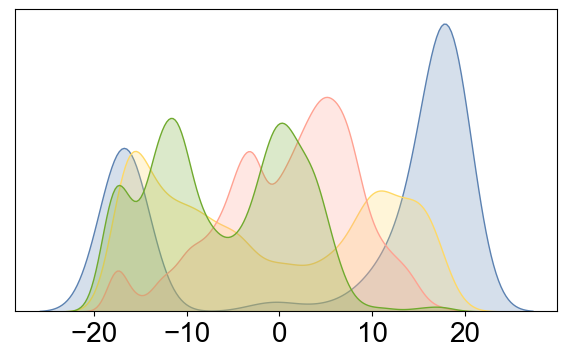

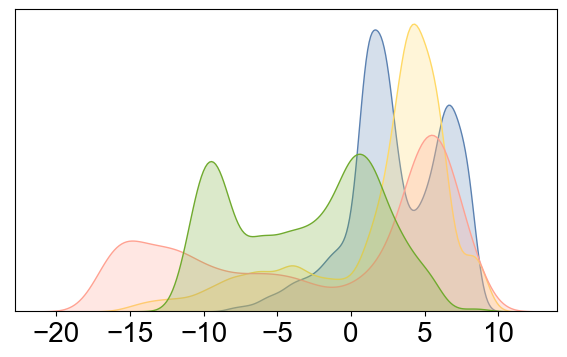

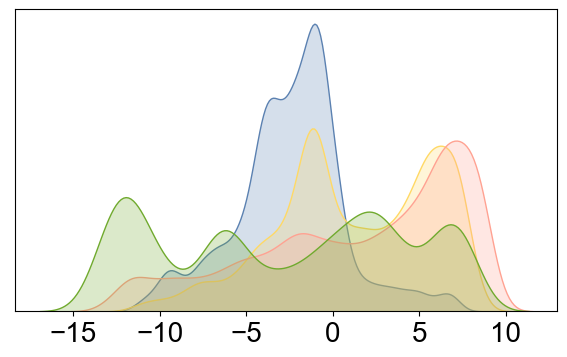

In [31]:
for gg in range(3):
    df = pd.DataFrame(np.array([emb[:,gg], Net_4]).T, columns=['GC', 'net'])

    plt.figure(figsize=(7,4), dpi=100)
    sns.kdeplot(data=df[df.net==1]['GC'], label=columns[0], shade=True, color=colors[0])
    sns.kdeplot(data=df[df.net==2]['GC'], label=columns[1], shade=True, color=colors[1])
    sns.kdeplot(data=df[df.net==3]['GC'], label=columns[2], shade=True, color=colors[2])
    sns.kdeplot(data=df[df.net==4]['GC'], label=columns[3], shade=True, color=colors[3])
    plt.xticks(fontsize=20)
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

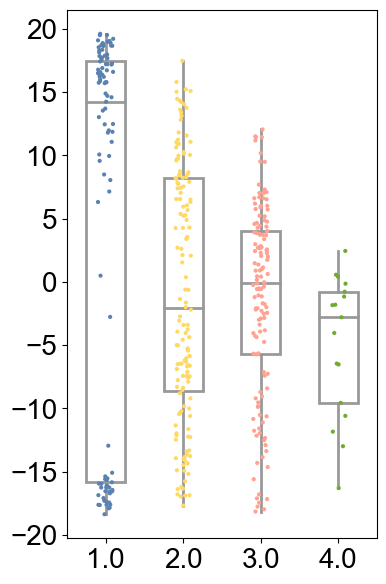

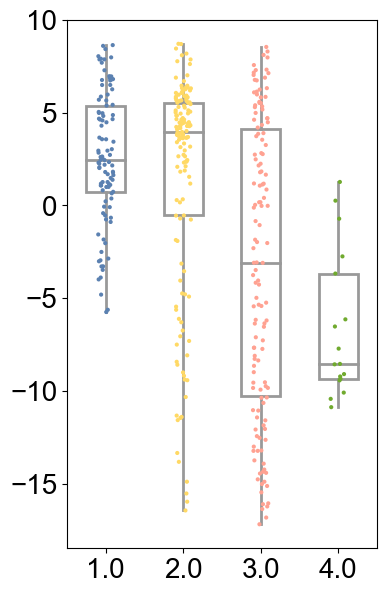

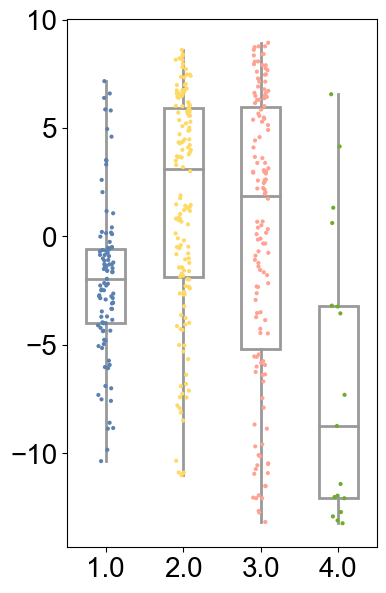

In [78]:
emb_atlas = np.array([np.sum(emb[atlas_data==(i+1)], axis=0)/len(np.argwhere(atlas_data==(i+1))) for i in range(400)])
Net_atlas = np.array([np.sum(Net_4[atlas_data==(i+1)], axis=0)/len(np.argwhere(atlas_data==(i+1))) for i in range(400)])
Net_atlas = Net_atlas.astype(np.int16)

for gg in range(3):
    # df = pd.DataFrame(np.array([emb[:,gg], Net_4]).T, columns=['GC', 'net'])
    df = pd.DataFrame(np.array([emb_atlas[:,gg], Net_atlas]).T, columns=['GC', 'net'])
    # df.to_csv(f'/n02dat01/users/dyli/Grad_data/Network_csv_results/Laminar_GC{gg+1}.csv')
    
    # emb_gg = np.squeeze(emb[:, gg])
    # box_data = [np.squeeze(emb_gg[np.argwhere(Net_4==i)]) for i in range(1,5)]
    emb_atlas_gg = np.squeeze(emb_atlas[:, gg])
    box_data = [np.squeeze(emb_atlas_gg[np.argwhere(Net_atlas==i)]) for i in range(1,5)]
    plt.figure(figsize=(4,7), dpi=100)
    sns.stripplot(data=df,
                  y="GC", 
                  x="net",
                  size=3,
                  dodge=False, 
                  jitter=True,
                  palette=colors)
    sns.boxplot(x="net", 
                y="GC", 
                data=df, 
                linewidth=2,
                color='#FFFFFF',
                showcaps=False, 
                width=0.5,
                whis=np.inf)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

# cytoar

In [79]:
## 读取网络数据
net_num = 7
Net = np.zeros(59412)
x = surface.load_surf_data('/n02dat01/users/dyli/Grad_data/support_data/cytoarchitectonic_7type.32k.L.func.gii')
Net[0:29696] = x[select_ind_L]
x = surface.load_surf_data('/n02dat01/users/dyli/Grad_data/support_data/cytoarchitectonic_7type.32k.R.func.gii')
Net[29696:59412] = x[select_ind_R]
Net = Net.astype(np.int32)

## 一些基本信息
columns = ['PM','AC1','AC2','PSS','PS','LB','IC']
# columns = [0,1,2,3,4,5,6]
colors = ['#632265', '#3952A4', '#098240', '#F69547', '#E1D91F', '#4CA9C5', '#C14E9C']

In [19]:
for gg in range(3):
    df = pd.DataFrame(np.array([emb[:,gg], Net]).T, columns=['GC', 'net'])
    df.to_csv(f'/n02dat01/users/dyli/Grad_data/Network_csv_results/Cytoar_GC{gg+1}.csv')

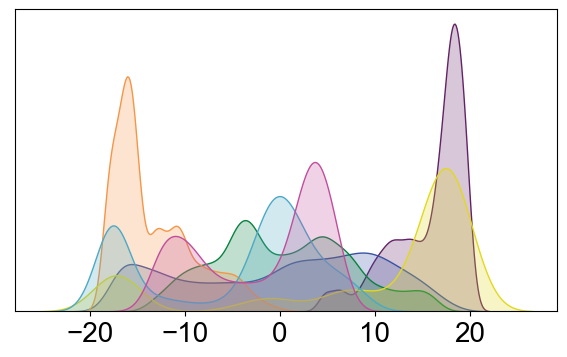

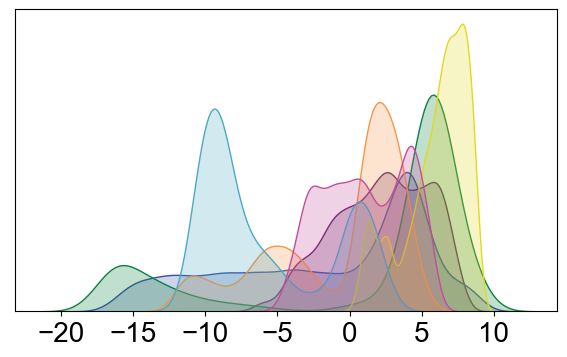

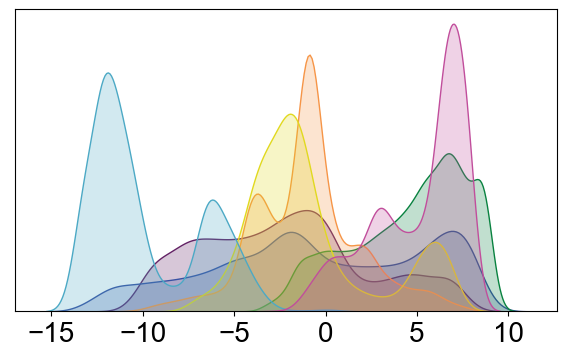

In [28]:
for gg in range(3):
    df = pd.DataFrame(np.array([emb[:,gg], Net]).T, columns=['GC', 'net'])

    plt.figure(figsize=(7,4), dpi=100)
    sns.kdeplot(data=df[df.net==1]['GC'], label=columns[0], shade=True, color=colors[0])
    sns.kdeplot(data=df[df.net==2]['GC'], label=columns[1], shade=True, color=colors[1])
    sns.kdeplot(data=df[df.net==3]['GC'], label=columns[2], shade=True, color=colors[2])
    sns.kdeplot(data=df[df.net==4]['GC'], label=columns[3], shade=True, color=colors[3])
    sns.kdeplot(data=df[df.net==5]['GC'], label=columns[4], shade=True, color=colors[4])
    sns.kdeplot(data=df[df.net==6]['GC'], label=columns[5], shade=True, color=colors[5])
    sns.kdeplot(data=df[df.net==7]['GC'], label=columns[6], shade=True, color=colors[6])
    plt.xticks(fontsize=20)
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

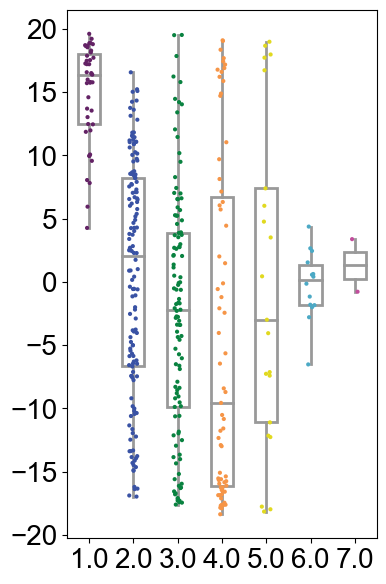

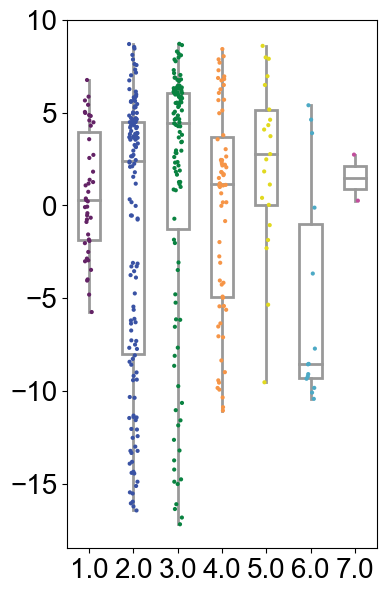

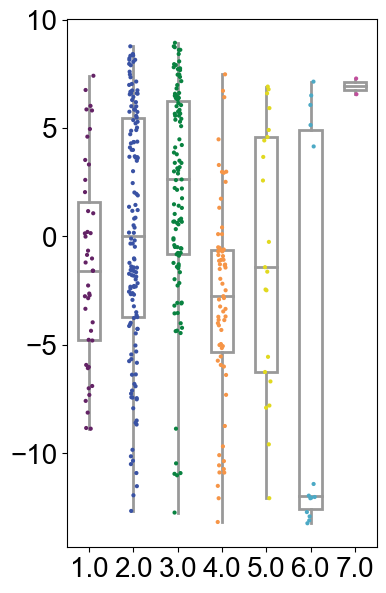

In [80]:
emb_atlas = np.array([np.sum(emb[atlas_data==(i+1)], axis=0)/len(np.argwhere(atlas_data==(i+1))) for i in range(400)])
Net_atlas = np.array([np.sum(Net[atlas_data==(i+1)], axis=0)/len(np.argwhere(atlas_data==(i+1))) for i in range(400)])
Net_atlas = Net_atlas.astype(np.int16)

for gg in range(3):
    # df = pd.DataFrame(np.array([emb[:,gg], Net_4]).T, columns=['GC', 'net'])
    df = pd.DataFrame(np.array([emb_atlas[:,gg], Net_atlas]).T, columns=['GC', 'net'])
    # df.to_csv(f'/n02dat01/users/dyli/Grad_data/Network_csv_results/Laminar_GC{gg+1}.csv')
    
    # emb_gg = np.squeeze(emb[:, gg])
    # box_data = [np.squeeze(emb_gg[np.argwhere(Net_4==i)]) for i in range(1,5)]
    emb_atlas_gg = np.squeeze(emb_atlas[:, gg])
    box_data = [np.squeeze(emb_atlas_gg[np.argwhere(Net_atlas==i)]) for i in range(1,8)]
    plt.figure(figsize=(4,7), dpi=100)
    sns.stripplot(data=df,
                  y="GC", 
                  x="net",
                  size=3,
                  dodge=False, 
                  jitter=True,
                  palette=colors)
    sns.boxplot(x="net", 
                y="GC", 
                data=df, 
                linewidth=2,
                color='#FFFFFF',
                showcaps=False, 
                width=0.5,
                whis=np.inf)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

# Genetic cluster 

In [81]:
## 读取网络数据
net_num = 4
Net_4 = np.zeros(59412)
x = surface.load_surf_data(f'/n02dat01/users/dyli/Grad_data/GCLUST/clusters/clusters/thickness4_lh_fs_LR32k.func.gii')
Net_4[0:29696] = x[select_ind_L]
x = surface.load_surf_data(f'/n02dat01/users/dyli/Grad_data/GCLUST/clusters/clusters/thickness4_rh_fs_LR32k.func.gii')
Net_4[29696:59412] = x[select_ind_R]
Net_4 = Net_4.astype(np.int32)

# 一些基本信息
columns = ['frontal lobe','occipital lobe','temporal lobe','postcentral cortex']
colors = ['#5050BE', '#BE3C4C', '#EBC37F', '#009650']

In [21]:
for gg in range(3):
    df = pd.DataFrame(np.array([emb[:,gg], Net_4]).T, columns=['GC', 'net'])
    df.to_csv(f'/n02dat01/users/dyli/Grad_data/Network_csv_results/Genetic_4cluster_GC{gg+1}.csv')

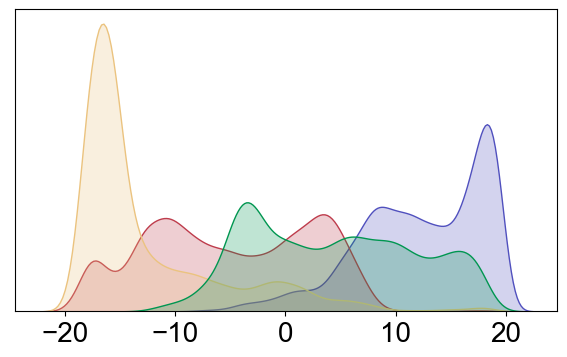

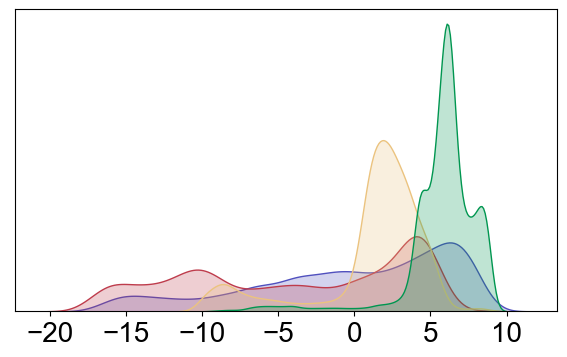

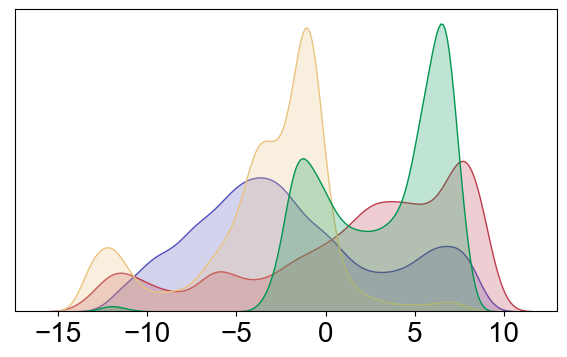

In [42]:
for gg in range(3):
    df = pd.DataFrame(np.array([emb[:,gg], Net_4]).T, columns=['GC', 'net'])

    plt.figure(figsize=(7,4), dpi=100)
    sns.kdeplot(data=df[df.net==1]['GC'], label=columns[0], shade=True, color=colors[0])
    sns.kdeplot(data=df[df.net==2]['GC'], label=columns[1], shade=True, color=colors[1])
    sns.kdeplot(data=df[df.net==3]['GC'], label=columns[2], shade=True, color=colors[2])
    sns.kdeplot(data=df[df.net==4]['GC'], label=columns[3], shade=True, color=colors[3])
    plt.xticks(fontsize=20)
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

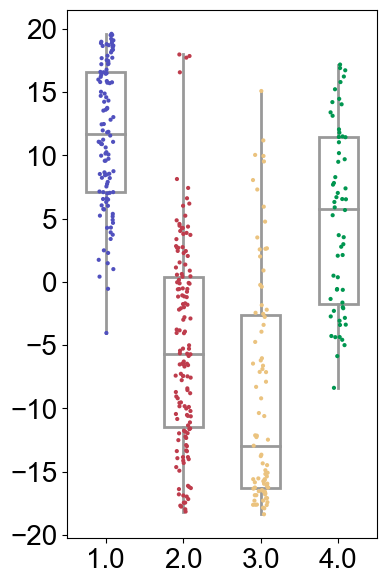

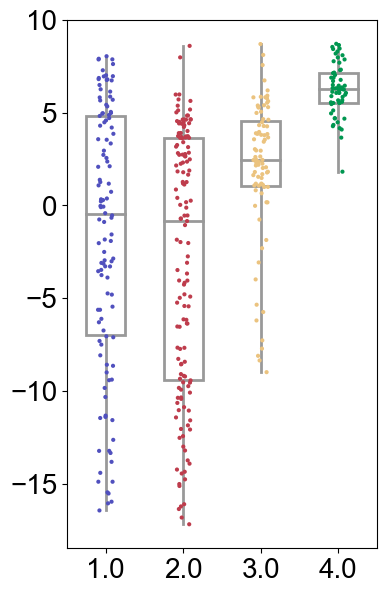

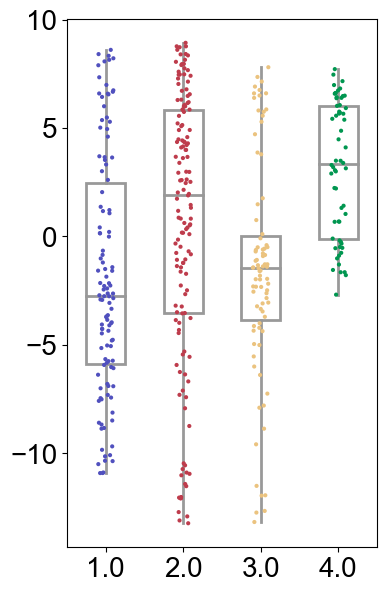

In [82]:
emb_atlas = np.array([np.sum(emb[atlas_data==(i+1)], axis=0)/len(np.argwhere(atlas_data==(i+1))) for i in range(400)])
Net_atlas = np.array([np.sum(Net_4[atlas_data==(i+1)], axis=0)/len(np.argwhere(atlas_data==(i+1))) for i in range(400)])
Net_atlas = Net_atlas.astype(np.int16)

for gg in range(3):
    # df = pd.DataFrame(np.array([emb[:,gg], Net_4]).T, columns=['GC', 'net'])
    df = pd.DataFrame(np.array([emb_atlas[:,gg], Net_atlas]).T, columns=['GC', 'net'])
    # df.to_csv(f'/n02dat01/users/dyli/Grad_data/Network_csv_results/Laminar_GC{gg+1}.csv')
    
    # emb_gg = np.squeeze(emb[:, gg])
    # box_data = [np.squeeze(emb_gg[np.argwhere(Net_4==i)]) for i in range(1,5)]
    emb_atlas_gg = np.squeeze(emb_atlas[:, gg])
    box_data = [np.squeeze(emb_atlas_gg[np.argwhere(Net_atlas==i)]) for i in range(1,5)]
    plt.figure(figsize=(4,7), dpi=100)
    sns.stripplot(data=df,
                  y="GC", 
                  x="net",
                  size=3,
                  dodge=False, 
                  jitter=True,
                  palette=colors)
    sns.boxplot(x="net", 
                y="GC", 
                data=df, 
                linewidth=2,
                color='#FFFFFF',
                showcaps=False, 
                width=0.5,
                whis=np.inf)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [83]:
## 读取网络数据
net_num = 12
Net_4 = np.zeros(59412)
x = surface.load_surf_data(f'/n02dat01/users/dyli/Grad_data/GCLUST/clusters/clusters/thickness12_lh_fs_LR32k.func.gii')
Net_4[0:29696] = x[select_ind_L]
x = surface.load_surf_data(f'/n02dat01/users/dyli/Grad_data/GCLUST/clusters/clusters/thickness12_rh_fs_LR32k.func.gii')
Net_4[29696:59412] = x[select_ind_R]
Net_4 = Net_4.astype(np.int32)

# 一些基本信息
columns = [f'roi{i}' for i in range(12)]
colors = ['#6d6e71', '#bf5b20', '#006e96', '#8c8700', '#ad5f7d', 
            '#d79100', '#789240', '#7d0100', '#8baaff', '#0863b5', 
            '#fec600', '#e3001f', '#009ee3', '#13a538']

In [23]:
for gg in range(3):
    df = pd.DataFrame(np.array([emb[:,gg], Net_4]).T, columns=['GC', 'net'])
    df.to_csv(f'/n02dat01/users/dyli/Grad_data/Network_csv_results/Genetic_12cluster_GC{gg+1}.csv')

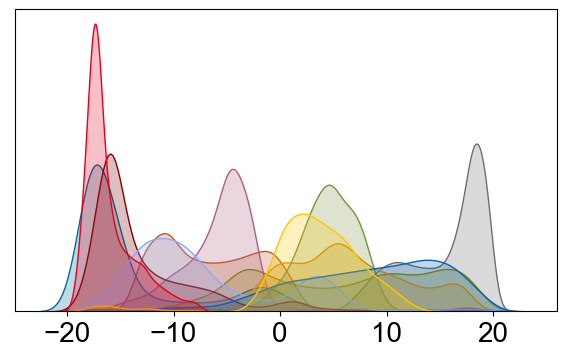

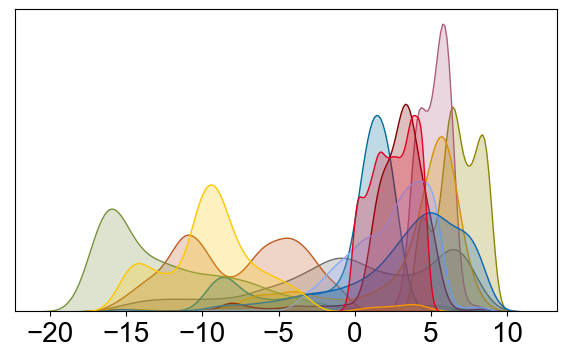

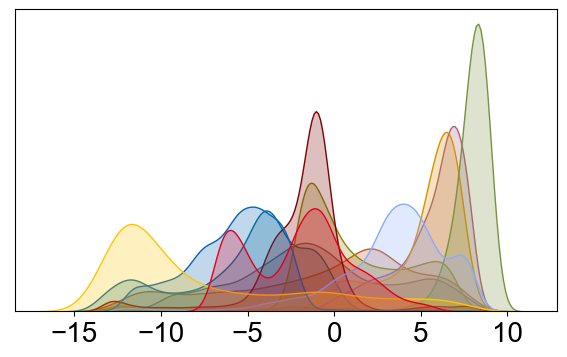

In [44]:
for gg in range(3):
    df = pd.DataFrame(np.array([emb[:,gg], Net_4]).T, columns=['GC', 'net'])

    plt.figure(figsize=(7,4), dpi=100)
    sns.kdeplot(data=df[df.net==1]['GC'], label=columns[0], shade=True, color=colors[0])
    sns.kdeplot(data=df[df.net==2]['GC'], label=columns[1], shade=True, color=colors[1])
    sns.kdeplot(data=df[df.net==3]['GC'], label=columns[2], shade=True, color=colors[2])
    sns.kdeplot(data=df[df.net==4]['GC'], label=columns[3], shade=True, color=colors[3])
    sns.kdeplot(data=df[df.net==5]['GC'], label=columns[4], shade=True, color=colors[4])
    sns.kdeplot(data=df[df.net==6]['GC'], label=columns[5], shade=True, color=colors[5])
    sns.kdeplot(data=df[df.net==7]['GC'], label=columns[6], shade=True, color=colors[6])
    sns.kdeplot(data=df[df.net==8]['GC'], label=columns[7], shade=True, color=colors[7])
    sns.kdeplot(data=df[df.net==9]['GC'], label=columns[8], shade=True, color=colors[8])
    sns.kdeplot(data=df[df.net==10]['GC'], label=columns[9], shade=True, color=colors[9])
    sns.kdeplot(data=df[df.net==11]['GC'], label=columns[10], shade=True, color=colors[10])
    sns.kdeplot(data=df[df.net==12]['GC'], label=columns[11], shade=True, color=colors[11])
    plt.xticks(fontsize=20)
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

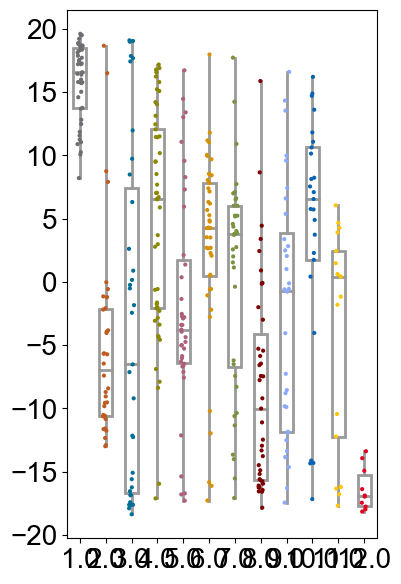

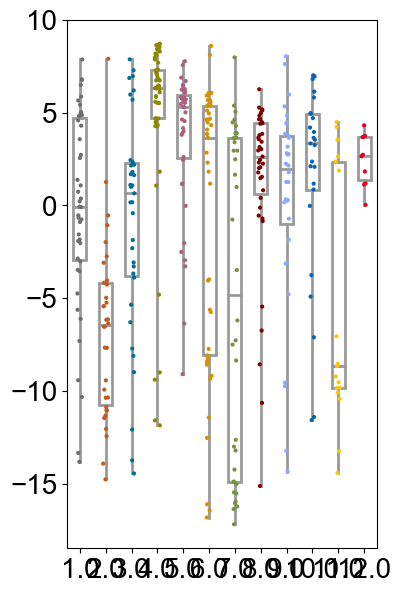

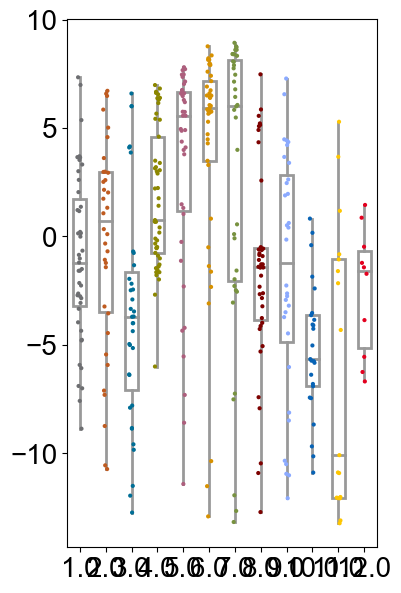

In [84]:
emb_atlas = np.array([np.sum(emb[atlas_data==(i+1)], axis=0)/len(np.argwhere(atlas_data==(i+1))) for i in range(400)])
Net_atlas = np.array([np.sum(Net_4[atlas_data==(i+1)], axis=0)/len(np.argwhere(atlas_data==(i+1))) for i in range(400)])
Net_atlas = Net_atlas.astype(np.int16)

for gg in range(3):
    # df = pd.DataFrame(np.array([emb[:,gg], Net_4]).T, columns=['GC', 'net'])
    df = pd.DataFrame(np.array([emb_atlas[:,gg], Net_atlas]).T, columns=['GC', 'net'])
    # df.to_csv(f'/n02dat01/users/dyli/Grad_data/Network_csv_results/Laminar_GC{gg+1}.csv')
    
    # emb_gg = np.squeeze(emb[:, gg])
    # box_data = [np.squeeze(emb_gg[np.argwhere(Net_4==i)]) for i in range(1,5)]
    emb_atlas_gg = np.squeeze(emb_atlas[:, gg])
    box_data = [np.squeeze(emb_atlas_gg[np.argwhere(Net_atlas==i)]) for i in range(1,5)]
    plt.figure(figsize=(4,7), dpi=100)
    sns.stripplot(data=df,
                  y="GC", 
                  x="net",
                  size=3,
                  dodge=False, 
                  jitter=True,
                  palette=colors)
    sns.boxplot(x="net", 
                y="GC", 
                data=df, 
                linewidth=2,
                color='#FFFFFF',
                showcaps=False, 
                width=0.5,
                whis=np.inf)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()